Linear Regression 

House price prediction using own dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

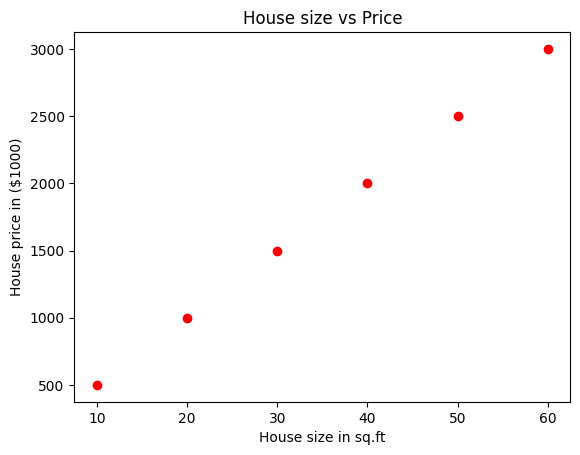

In [7]:
house_size=np.array([10,20,30,40,50,60])
house_price=np.array([500,1000,1500,2000,2500,3000])
plt.scatter(house_size,house_price, color="red")
plt.title("House size vs Price")
plt.ylabel("House price in ($1000)")
plt.xlabel("House size in sq.ft")
plt.show()

In [ ]:
model=LinearRegression()
model.fit(house_price,house_size)
